In [2]:
# Compute Drawdowns

<AxesSubplot:>

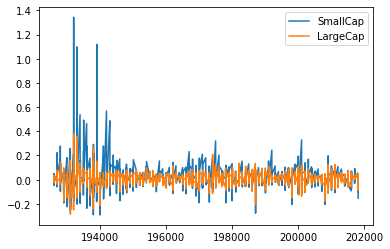

In [13]:
import pandas as pd

me_m = pd.read_csv("C:/Users/USER/coursera_py/Introduction to Portfolio Construction and Analysis with Python/data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

<AxesSubplot:>

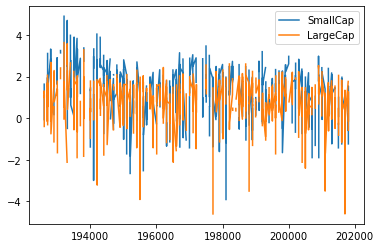

In [12]:
# log scale로 하면 어떻게 될까? 갑자기 궁금..
import numpy as np

me_m = pd.read_csv("C:/Users/USER/coursera_py/Introduction to Portfolio Construction and Analysis with Python/data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = np.log(rets)
rets.plot.line()

#훨씬 보기 불편. log scale은 특정 상황에서 쓴다.
#계량금융 프로젝트에서 했듯이, 기업별 asset 비교할 때와 같이 데이터 범위가 너무 들쭉날쭉할 때.

In [14]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [16]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [17]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [19]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [20]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [26]:
rets["1975"]

<ipython-input-26-968df3c41f0f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1975"]


,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [27]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [29]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a wealth index
2. Comput previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

In [35]:
wealth_index = 1000 * (1+rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

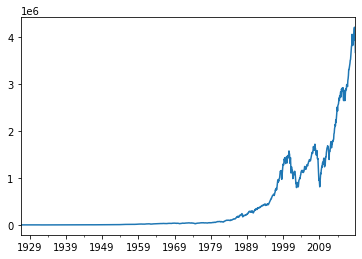

In [36]:
wealth_index.plot.line()

<AxesSubplot:>

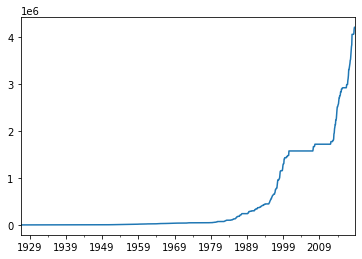

In [40]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

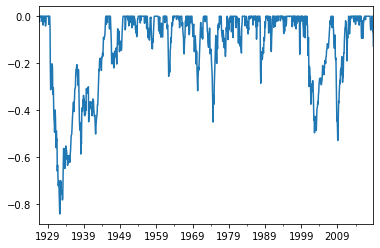

In [44]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [45]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [49]:
drawdown.min()

-0.8400375277943123

In [50]:
drawdown["1975":].min() #1975년 이후 최소 drawdown 값

-0.5280945042309304

In [51]:
drawdown["1975":].idxmin() #1975년 이후 최소 drawdown 값을 갖는 index
#2009년인 걸 보니 2008~2009 금융위기 때라고 생각할 수 있다

Period('2009-02', 'M')

In [52]:
drawdown.idxmin() #1932년인 걸 보니 1929 대공황 후라고 생각할 수 있다

Period('1932-05', 'M')

In [58]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a Dataframe that contains:
    the wealth index, 
    the previous peaks, and 
    the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [64]:
drawdown(rets["LargeCap"])[["Wealth", "Previous Peak"]].head()

,Wealth,Previous Peak
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

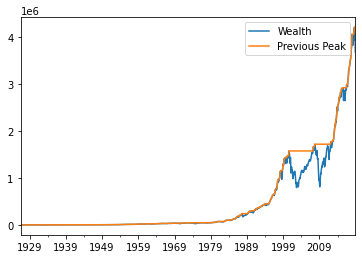

In [66]:
drawdown(rets["LargeCap"])[["Wealth", "Previous Peak"]].plot()

<AxesSubplot:>

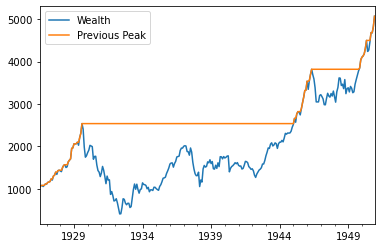

In [69]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Previous Peak"]].plot()

In [70]:
drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [73]:
drawdown(rets["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [74]:
drawdown(rets["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [75]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [76]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [79]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [80]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252386

In [81]:
drawdown(rets["1940":]["SmallCap"])["Drawdown"].idxmin()

Period('1974-12', 'M')

In [82]:
drawdown(rets["1940":]["SmallCap"])["Drawdown"].min()

-0.7000596091967917